In [8]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from contrastive_tda.catalog import Catalog

cat = Catalog()
movie_reviews = cat.load_movie_reviews()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
data = pd.DataFrame([x.model_dump() for x in movie_reviews])

In [1]:
import pandas as pd
import numpy as np

# TODO: remove 2nd row with column descriptions
df = pd.read_excel("../data/Movie_Reviews_Manual_Edits.xlsx")

def concat_components(acting, direction, cinematography):
    return acting + " " + direction + " " + cinematography

df["full_prompt"] = df.apply(
    lambda x: concat_components(
        x["edited_acting"],
        x["edited_direction"],
        x["edited_cinematography"],
    ),
    axis=1,
)

df["full_prompt"].head().values.tolist()


def embed(x: str) -> np.ndarray:
    pass

df["full_prompt_embedding"] = df["full_prompt"].apply(embed)

df.is_acting_edited = df.is_acting_edited.map({
    "Yes": True,
    "No": False,
})

# same for direction and cinematography

df.is_acting_edited.value_counts()

In [19]:
# df.loc: access a group of rows and columns by label(s) or a boolean array
# ~: logical not
df.loc[df.is_acting_edited,:].shape # 33 rows, same # num columns

# for rows where acting has been edited, we need to embed one-by-one
# should create a new column for the embeddings
df.loc[df.is_acting_edited,"edited_acting_embedding"] = df.loc[df.is_acting_edited,"edited_acting"].apply(embed)

#embed function is pseudocode at this point

# for rows where acting has not been edited, we can use the original embedding
df.loc[~df.is_acting_edited,"edited_acting_embedding"] = # embedding for the original acting component of the prompt

# repeat for direction and cinematography


ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [23]:
print(df)

     example 1  \
0    example 2   
1    example 3   
2    example 4   
3    example 5   
4    example 6   
..         ...   
93  example 95   
94  example 96   
95  example 97   
96  example 98   
97  example 99   

   Abhiram Borra's direction in The Dreams is nothing short of exceptional. He masterfully guides the narrative, maintaining a perfect balance between suspense and emotional depth. His ability to create a dreamlike atmosphere throughout the film is truly remarkable. Borra's storytelling unfolds like a carefully orchestrated symphony, with every note striking a chord in the audience's hearts.  \
0   Abhiram Borra's direction in The Dreams is not...                                                                                                                                                                                                                                                                                                                                            

In [15]:

# df[["TSNE1", "TSNE2", "full_prompt_sentiment"]].to_csv(
#     "../data/full_prompt_tsne_with_sentiment.csv", index=False, header=False
# )

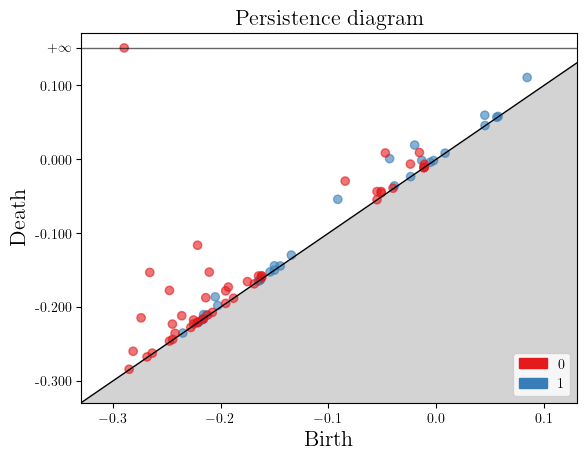

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import gudhi as gd
from gudhi import AlphaComplex

df = pd.read_json("../data/all_data_2.jsonl", lines=True)

points = df[["TSNE1", "TSNE2"]].values
weights = df["full_prompt_sentiment"].values

ac = AlphaComplex(points=points,weights = weights)
stree = ac.create_simplex_tree()
dgm = stree.persistence()
gd.plot_persistence_diagram(dgm, legend = True)
plt.show()

In [2]:
!pip install gudhi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 1.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# ac = AlphaComplex(points=[[1, 1], [7, 0], [4, 6], [9, 6], [0, 14], [2, 19], [9, 17]])

# stree = ac.create_simplex_tree()

In [7]:
from gudhi import AlphaComplex
# check scaling vs. dimensionality and number of datapoints
# create random numpy arrays of different sizes

import numpy as np
from wasabi import msg

num_dimensions_ = [2, 3, 4, 5, 6, 7]
num_datapoints_ = [10, 20, 30]

from itertools import product
import time
import seaborn as sns

results = []

for num_datapoints, num_dimensions in product(num_datapoints_, num_dimensions_):
    data = np.random.rand(num_datapoints, num_dimensions)
    start_time = time.time()
    ac = AlphaComplex(points=data)
    stree = ac.create_simplex_tree()
    end_time = time.time()
    comp_time = end_time - start_time
    print(f"num_dimensions: {num_dimensions}, num_datapoints: {num_datapoints}")
    print(f"Computation time: {comp_time} seconds")
    results.append(
        {
            "num_dimensions": num_dimensions,
            "num_datapoints": num_datapoints,
            "comp_time": comp_time,
        }
    )

num_dimensions: 2, num_datapoints: 10
Computation time: 0.004154205322265625 seconds
num_dimensions: 3, num_datapoints: 10
Computation time: 0.0004620552062988281 seconds
num_dimensions: 4, num_datapoints: 10
Computation time: 0.011686086654663086 seconds
num_dimensions: 5, num_datapoints: 10
Computation time: 0.06334304809570312 seconds
num_dimensions: 6, num_datapoints: 10
Computation time: 0.16584396362304688 seconds
num_dimensions: 7, num_datapoints: 10
Computation time: 0.23956894874572754 seconds
num_dimensions: 2, num_datapoints: 20
Computation time: 0.000492095947265625 seconds
num_dimensions: 3, num_datapoints: 20
Computation time: 0.000743865966796875 seconds
num_dimensions: 4, num_datapoints: 20
Computation time: 0.05023479461669922 seconds
num_dimensions: 5, num_datapoints: 20
Computation time: 0.37541699409484863 seconds
num_dimensions: 6, num_datapoints: 20
Computation time: 1.7538542747497559 seconds
num_dimensions: 7, num_datapoints: 20
Computation time: 7.6272859573364

<AxesSubplot: xlabel='num_dimensions', ylabel='comp_time'>

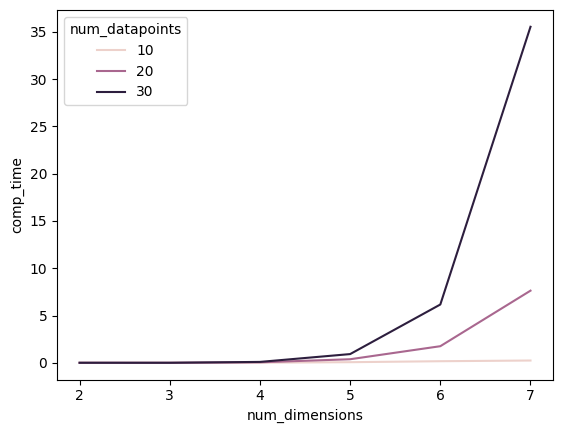

In [8]:
import pandas as pd
results = pd.DataFrame(results)
sns.lineplot(data=results, x="num_dimensions", y="comp_time", hue="num_datapoints")

In [8]:
%load_ext autoreload
%autoreload 2

from contrastive_tda.catalog import Catalog

catalog = Catalog()
original_acting, original_direction, original_cinematography = catalog.load_original_movie_review_components()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
movie_reviews = catalog.load_movie_reviews_manual_edits()

In [11]:
original_acting

"The ensemble cast's performances in The Dreams are a testament to the power of exceptional acting. Each actor brings their character to life with such authenticity that it's impossible not to become fully immersed in their world. The chemistry between the lead actors is palpable, delivering an emotional resonance that resonates long after the credits roll. Standout performances from the entire cast elevate the film to a level of cinematic brilliance rarely seen."

In [1]:
import pandas as pd
import json

In [2]:
path = "../data/llm_edited_reviews/llm_edited_reviews.jsonl"

with open(path, "r") as f:
    lines = f.readlines()
    data = [json.loads(line) for line in lines]

df = pd.read_json(path, lines=True)

In [5]:
data

[{'original_acting': "The ensemble cast's performances in The Dreams are a testament to the power of exceptional acting. Each actor brings their character to life with such authenticity that it's impossible not to become fully immersed in their world. The chemistry between the lead actors is palpable, delivering an emotional resonance that resonates long after the credits roll. Standout performances from the entire cast elevate the film to a level of cinematic brilliance rarely seen.",
  'original_direction': "Abhiram Borra's direction in The Dreams is nothing short of exceptional. He masterfully guides the narrative, maintaining a perfect balance between suspense and emotional depth. His ability to create a dreamlike atmosphere throughout the film is truly remarkable. Borra's storytelling unfolds like a carefully orchestrated symphony, with every note striking a chord in the audience's hearts.",
  'original_cinematography': "The cinematography in The Dreams is nothing short of breatht

0

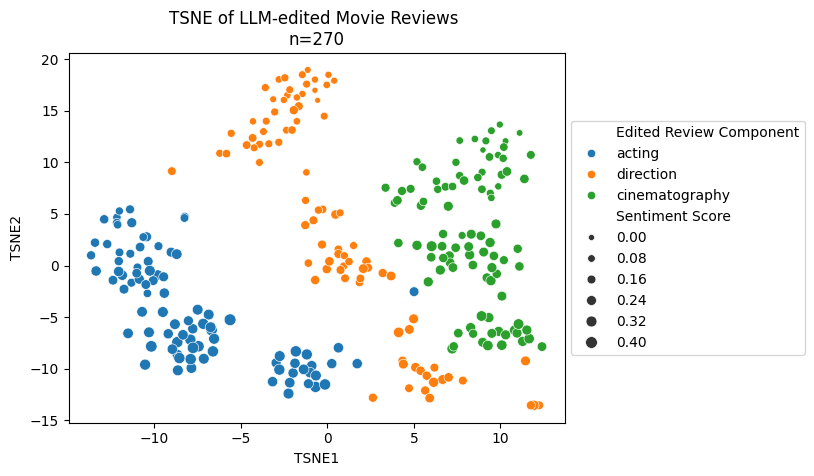

In [8]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns

data = pd.read_json("../data/llm_edited_reviews_embedded_with_sentiment/llm_edited_reviews_embedded_with_sentiment.jsonl", lines=True)

data_embeddings = np.array(data["full_prompt_embedding"].apply(lambda x: np.array(x)).tolist()) 

tsne = TSNE(n_components=2, random_state=42)
data_tsne = pd.DataFrame(tsne.fit_transform(data_embeddings), columns=["TSNE1", "TSNE2"])


viz_data = pd.concat([data_tsne, data.full_prompt, data.full_prompt_sentiment, data.edited_component], axis=1).rename(columns={"edited_component": "Edited Review Component","full_prompt_sentiment": "Sentiment Score"})

ax = sns.scatterplot(data=viz_data, x="TSNE1", y="TSNE2", hue="Edited Review Component", size="Sentiment Score")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title(f"TSNE of LLM-edited Movie Reviews \nn={len(data)}")

import altair as alt

chart = alt.Chart(viz_data).mark_circle().encode(
    alt.X('TSNE1', scale=alt.Scale(zero=False)),
    alt.Y('TSNE2', scale=alt.Scale(zero=False, padding=1)),
    color='Edited Review Component',
    size='Sentiment Score',
    tooltip=alt.Tooltip('full_prompt')
).properties(
    title='TSNE of LLM-edited Movie Reviews'
)

csv_data = pd.concat([pd.DataFrame(data_embeddings), data.full_prompt_sentiment, data.edited_component], axis=1)
csv_data.to_csv("../data/llm_edited_reviews_embedded_with_sentiment/llm_edited_reviews_embedded_with_sentiment.csv", index=False, header=True)

# chart.save('llm_edited_reviews_interactive_tsne.html',inline=True)
import os
chart_url = chart.to_url()
os.system(f'echo {chart_url} | pbcopy')



In [7]:
csv_data

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,full_prompt_sentiment,edited_component
0,1.363281,0.683594,-3.111328,0.254883,-1.018555,1.405273,-1.908203,-1.996094,0.075806,-0.471191,...,-0.019089,-2.128906,-2.789062,-0.643555,0.402100,-0.066467,-1.263672,-2.859375,0.237660,acting
1,1.289062,0.753906,-3.138672,0.340332,-1.188477,1.352539,-1.939453,-1.925781,-0.028061,-0.280273,...,0.065125,-2.273438,-2.847656,-0.634766,0.420410,-0.167114,-1.097656,-2.736328,0.212927,acting
2,0.956055,0.709473,-2.757812,0.075073,-0.774414,1.119141,-1.719727,-1.687500,0.145630,-0.003080,...,0.061523,-1.883789,-3.298828,-0.741699,0.025116,-0.137329,-1.072266,-2.380859,0.167667,acting
3,1.197266,0.795898,-3.224609,0.471191,-0.880859,1.493164,-2.083984,-1.953125,0.131714,-0.287354,...,0.003078,-2.359375,-2.898438,-0.618164,0.405762,-0.212524,-1.264648,-2.658203,0.269792,acting
4,1.199219,0.744629,-3.302734,0.347656,-0.893066,1.429688,-1.958008,-2.017578,-0.020905,-0.411377,...,0.387695,-2.107422,-2.970703,-0.511719,0.314453,-0.145386,-1.183594,-2.605469,0.190535,acting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.151367,0.684082,-2.876953,0.259277,-1.165039,1.409180,-2.091797,-1.556641,0.057373,-0.379150,...,0.194946,-3.011719,-2.880859,-0.409424,0.902832,-0.061920,-1.378906,-2.873047,0.247235,cinematography
266,1.008789,0.734375,-2.695312,0.245239,-1.298828,1.542969,-1.961914,-1.722656,0.156982,-0.235474,...,0.139404,-2.783203,-2.785156,-0.438232,0.688965,0.019531,-1.407227,-2.955078,0.175694,cinematography
267,1.041992,0.771973,-2.769531,0.213867,-1.182617,1.564453,-2.097656,-1.546875,0.167114,-0.387939,...,-0.075378,-2.984375,-2.841797,-0.220581,0.697266,-0.047516,-1.198242,-2.791016,0.284480,cinematography
268,1.257812,0.706543,-2.740234,0.253418,-1.183594,1.550781,-2.044922,-1.747070,0.172729,-0.232544,...,0.036835,-2.605469,-2.966797,-0.383057,0.619629,-0.019165,-1.343750,-2.968750,0.209052,cinematography
